# wsitools demo

In [ ]:
%load_ext autoreload
%autoreload 2

## Installing dependencies and import needed modules

In [ ]:
# Instalations of needed modules
!pip install openslide-python imagecodecs loguru read_roi czifile
!pip install git+https://github.com/mjirik/imma.git

# Openslide installation
!apt-get install openslide-tools
# !apt-get install python-openslide
!pip install openslide-python

# Modules import
import matplotlib.pyplot as plt
import numpy as np
import imma
import openslide
import requests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.0/359.0 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.6/39.6 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for openslide-python: filename=openslide_python-1.3.1-cp310-cp310-linux_x86_64.whl size=33547 sha256=7037cc155770b43510fe3a4dc42a970b877f174ffb69b65cd8232123feef011b
  Stored in directory: /root/.cache/pip/wheels/79/79/fa/29a0087493c69dff7fd0b70fab5d6771002a531010161d2d97
  Created wheel for read_roi: filename=read_roi-1.6.0-py2.py3-none-any.whl size=8018 sha256=a94b1d3b014070dbf0392518928a259b0f0b322d135170977744f02f77346220
  Stored in directory: /root/.cache/pip/wheels/09/67/72/4903ef58791d5330f9946373f84126b8b79027879ac828702e
Successfully built openslide-python read_roi
  Cloning https://github.com/mjirik/imma.git to /tmp/pip-req-build-jonxo17b
 

In [ ]:
!python --version
print("Numpy version: {}".format(np.__version__))

Python 3.10.12
Numpy version: 1.25.2


## WSI tools

In [ ]:
# WSI tools installation
!pip install git+https://github.com/mjirik/wsitools.git

  Cloning https://github.com/mjirik/wsitools.git to /tmp/pip-req-build-rbv6b1ml
  Running command git clone --filter=blob:none --quiet https://github.com/mjirik/wsitools.git /tmp/pip-req-build-rbv6b1ml
  Resolved https://github.com/mjirik/wsitools.git to commit f6838abf48c43a754f6d81ab5374438b3f2d7020
  Preparing metadata (setup.py) ... done
  Created wheel for wsitools: filename=wsitools-0.1.0-py2.py3-none-any.whl size=30424 sha256=82e1c64555e04c5f6aff25de9c07b6e96a630b620613621c9fea3b6cd1169671
  Stored in directory: /tmp/pip-ephem-wheel-cache-2mbin7e8/wheels/e7/90/f0/a64e5e83413259627b872fb44d41b0f233a6551ade74a9e640
Successfully built wsitools


### Image procesing

In [ ]:
import wsitools.image

Own upload of .czi file

In [ ]:
# filename = "J7_5_a_ann0001.czi"
# filename = "J7_5_a_test.czi"
# anim = wsitools.image.AnnotatedImage(filename)

# # Annotations
# print(anim.annotations)

Getting .czi file via url

In [ ]:
# Possible filenames: J7_5_a.czi, J7_25_a_ann0004.czi, J8_8_a.czi
filename = "J7_5_a.czi"

# URL of the file on GitHub
url_path = "https://github.com/janburian/Masters_thesis/raw/main/data_czi/" + filename

# Fetch the file
response = requests.get(url_path)

# Check if the request was successful
if response.status_code == 200:
    # Save the content to a local file
    with open(filename, "wb") as file:
        file.write(response.content)
else:
    print("Failed to fetch the file from GitHub")

# Now you can use the local file in your code
anim = wsitools.image.AnnotatedImage(filename)

# Annotations
# print(anim.annotations)

2024-02-16 12:50:50.916 | DEBUG    | wsitools.image:__init__:427 - fs_enc: utf-8
2024-02-16 12:50:50.919 | DEBUG    | wsitools.image:__init__:428 - Reading file J7_5_a.czi
2024-02-16 12:50:50.952 | DEBUG    | wsitools.image:_set_properties_czi:360 - nzi pixelsize  8.772367043811993e-07x8.772367043811993e-07 [m]
2024-02-16 12:50:50.958 | DEBUG    | wsitools.image:read_annotations:736 - Reading the annotation J7_5_a.czi


Show picture using anim (image.AnnotatedImage())

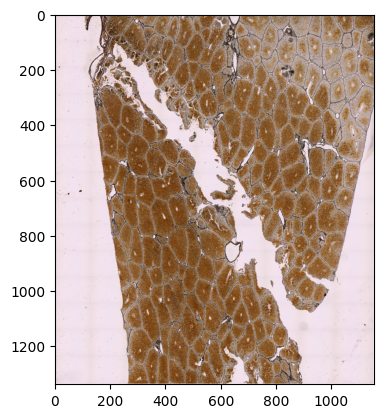

In [ ]:
view = anim.get_full_view(
    # pixelsize_mm=[0.0003, 0.0003]
    pixelsize_mm=[0.01, 0.01]
)  # wanted pixelsize in mm in view
img = view.get_raster_image()
plt.imshow(img)
plt.show()